## Importing Librairies 

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

### import dataset 

In [47]:
sns.set(style="whitegrid")
ROOT = Path().resolve()  # current working directory
path1 = ROOT / "data" / "Thyroid_Diff.csv"
path2 = ROOT.parent / "data" / "Thyroid_Diff.csv"
path3 = ROOT / "data" / "penguins.csv"
path4 = ROOT.parent / "data" / "penguins.csv"

csv_path1= path1 if path1.exists() else path2
print("Loading:", csv_path1)
csv_path2= path3 if path3.exists() else path4


df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)

Loading: /Users/asmiwassim/Desktop/Master Mathématiques informatiques unige/Master's Course /Artificial Intelligence /Projects /Decision_Trees_Random_Forests_Project/data/Thyroid_Diff.csv


In [48]:
df1.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [49]:
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Dataset 1 : Thyroid Cancer dataset EDA

In [50]:
# Define target variable
target_col = "Recurred"

# Separate features and target
feature_cols = [col for col in df1.columns if col != target_col]

# Dataset statistics
n_samples = df1.shape[0]
n_features = len(feature_cols)

continuous_features = df1[feature_cols].select_dtypes(include=[np.number]).columns
categorical_features = df1[feature_cols].select_dtypes(exclude=[np.number]).columns

n_continuous = len(continuous_features)
n_categorical = len(categorical_features)

# Display summary (for reporting)
summary = pd.DataFrame({
    "Dataset": ["Differentiated Thyroid Cancer Recurrence"],
    "Samples": [n_samples],
    "Features": [n_features],
    "Continuous features": [n_continuous],
    "Categorical features": [n_categorical],
    "Target": [target_col]
})
print(summary.to_string(index=False))

                                 Dataset  Samples  Features  Continuous features  Categorical features   Target
Differentiated Thyroid Cancer Recurrence      383        16                    1                    15 Recurred


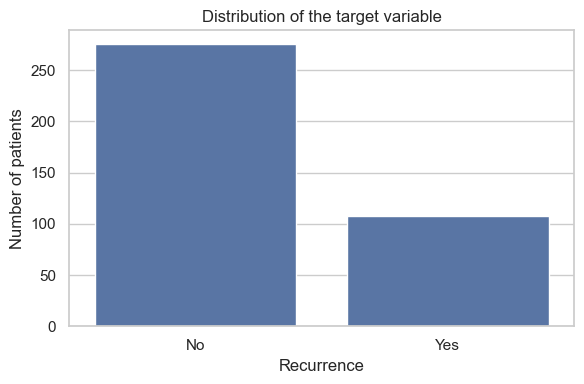

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x="Recurred", data=df1)
plt.xlabel("Recurrence")
plt.ylabel("Number of patients")
plt.title("Distribution of the target variable")
plt.tight_layout()
plt.show()


In [ ]:
# Count missing values per feature
missing_values = df1.isnull().sum()
# Keep only features with missing values
missing_values = missing_values[missing_values > 0]

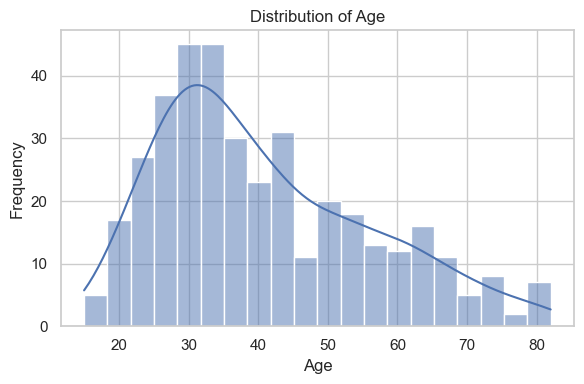

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df1["Age"], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.tight_layout()
plt.show()

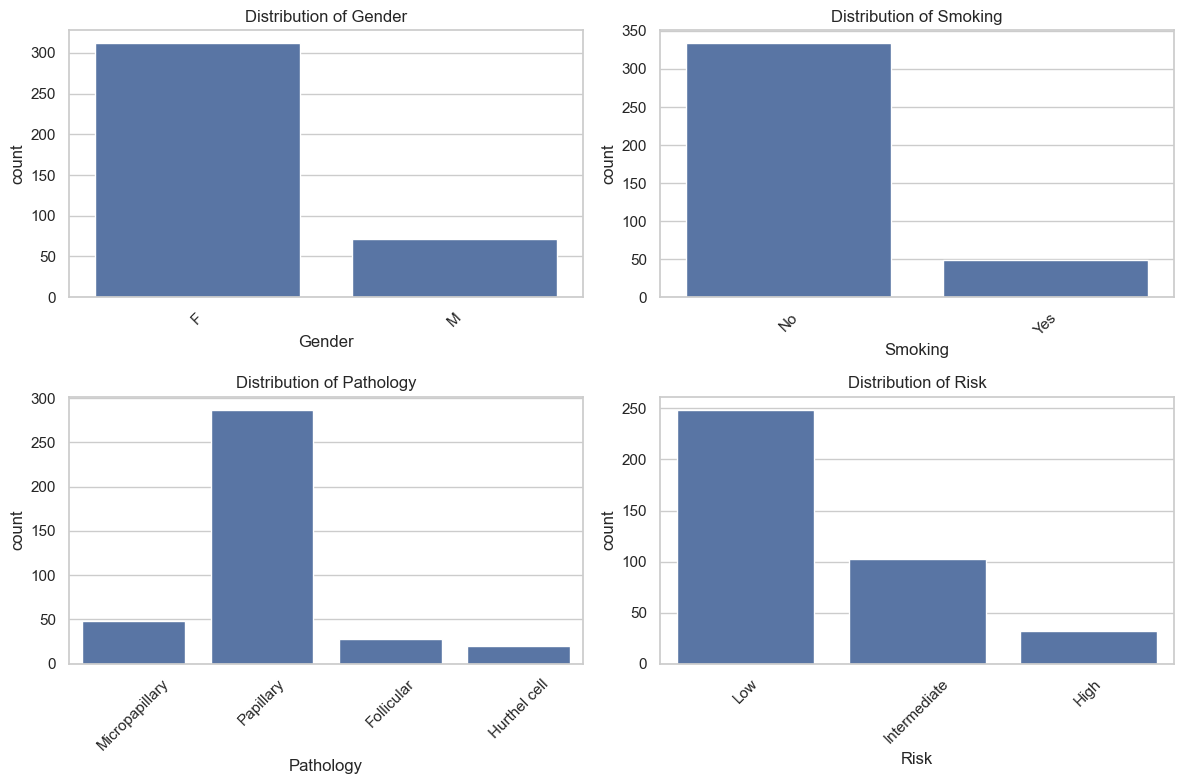

In [58]:
categorical_vars = ["Gender", "Smoking", "Pathology", "Risk"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, col in zip(axes, categorical_vars):
    sns.countplot(x=col, data=df1, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


### Dataset 2 : Palmer penguins 

In [ ]:
# Define target variable (Penguins)
target_col = "species"

# Separate features and target
feature_cols = [col for col in df2.columns if col != target_col]

# Dataset statistics
n_samples = df2.shape[0]
n_features = len(feature_cols)

continuous_features = df2[feature_cols].select_dtypes(include=[np.number]).columns
categorical_features = df2[feature_cols].select_dtypes(exclude=[np.number]).columns

n_continuous = len(continuous_features)
n_categorical = len(categorical_features)

# Display summary (for reporting)
summary_penguins = pd.DataFrame({
    "Dataset": ["Palmer Penguins"],
    "Samples": [n_samples],
    "Features": [n_features],
    "Continuous features": [n_continuous],
    "Categorical features": [n_categorical],
    "Target": [target_col]
})

print(summary_penguins.to_string(index=False))
print("\nContinuous:", list(continuous_features))
print("Categorical:", list(categorical_features))

        Dataset  Samples  Features  Continuous features  Categorical features  Target
Palmer Penguins      344         6                    4                     2 species

Continuous: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Categorical: ['island', 'sex']


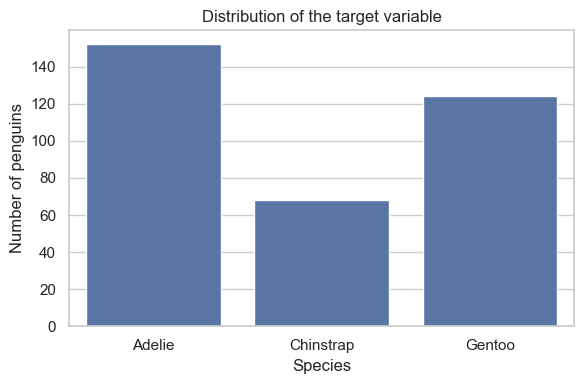

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x="species", data=df2)
plt.xlabel("Species")
plt.ylabel("Number of penguins")
plt.title("Distribution of the target variable")
plt.tight_layout()
plt.show()

In [ ]:
# Count missing values per feature
missing_values = df2.isnull().sum()
# Keep only features with missing values
missing_values = missing_values[missing_values > 0]

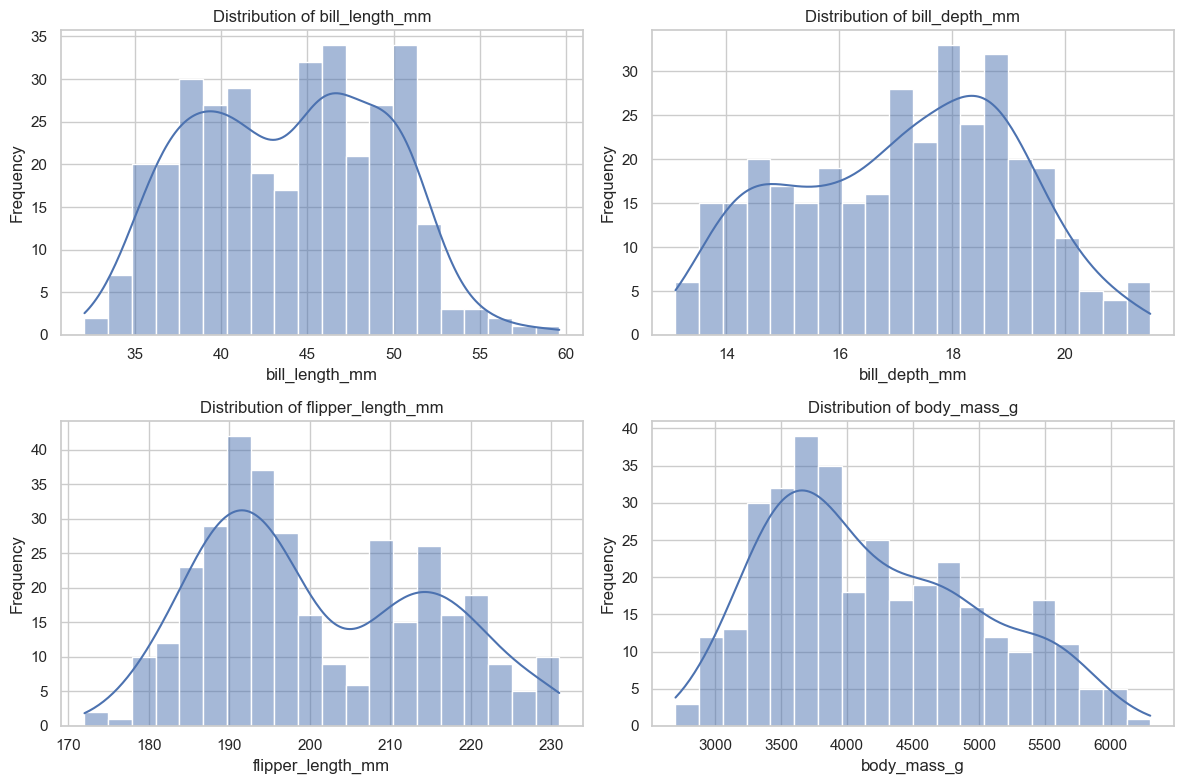

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()  # pour itérer facilement sur les 4 axes

for ax, col in zip(axes, continuous_features):
    sns.histplot(df2[col].dropna(), bins=20, kde=True, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

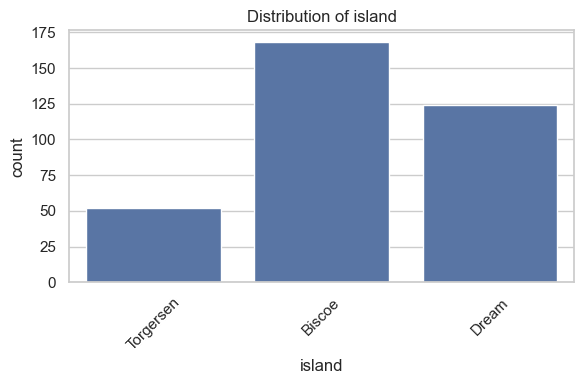

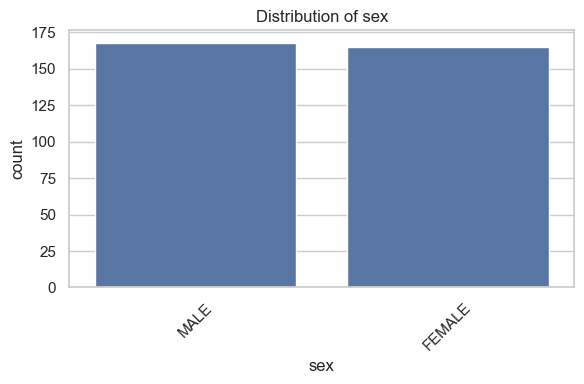

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df2)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()